In [136]:
#Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
%matplotlib inline
sns.set_style('whitegrid')
PATH='~/Downloads/Upgrad/Linear Regression Assignment/Data Files/'
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [137]:
#Loading our dataset
carprice=pd.read_csv(PATH+'CarPrice_Assignment.csv')


In [138]:
carprice.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [139]:
carprice.shape

(205, 26)

In [140]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [141]:
carDictionary=pd.read_excel(PATH+'Data Dictionary - carprices.xlsx')

In [142]:
pd.set_option('display.max_colwidth', -1)
carDictionary

,Variable,Desc
0,Car_ID,Unique id of each observation (Interger)
1,Symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"
2,carCompany,Name of car company (Categorical)
3,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,aspiration,Aspiration used in a car (Categorical)
5,doornumber,Number of doors in a car (Categorical)
6,carbody,body of car (Categorical)
7,drivewheel,type of drive wheel (Categorical)
8,enginelocation,Location of car engine (Categorical)
9,wheelbase,Weelbase of car (Numeric)


In [143]:
#Checking if there is any missing data in the dataset
carprice.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [144]:
carprice['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [145]:
#Creating a new variable company from CarName and doing some spelling corrections
carprice['Company']=carprice['CarName'].apply(lambda x: x.lower().split(' ')[0])
carprice['Company']=carprice['Company'].replace({'maxda':'mazda', 'toyouta': 'toyota', 'vokswagen':'volkswagen','vw':'volkswagen','porcshce':'porsche'})


In [146]:
#Dropping CarID and CarName fields

carprice.drop('car_ID',axis=1,inplace=True)
carprice.drop('CarName',axis=1,inplace=True)


In [147]:
# get some basic ideas about the data
def summarize_data(df):
    for column in df.columns:
        print (column)
        if df.dtypes[column] == np.object: # Categorical data
            print (df[column].value_counts())
        else:
            print (df[column].describe() )
            
        print ('\n')
    
summarize_data(carprice)

symboling
count    205.000000
mean     0.834146  
std      1.245307  
min     -2.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      3.000000  
Name: symboling, dtype: float64


fueltype
gas       185
diesel    20 
Name: fueltype, dtype: int64


aspiration
std      168
turbo    37 
Name: aspiration, dtype: int64


doornumber
four    115
two     90 
Name: doornumber, dtype: int64


carbody
sedan          96
hatchback      70
wagon          25
hardtop        8 
convertible    6 
Name: carbody, dtype: int64


drivewheel
fwd    120
rwd    76 
4wd    9  
Name: drivewheel, dtype: int64


enginelocation
front    202
rear     3  
Name: enginelocation, dtype: int64


wheelbase
count    205.000000
mean     98.756585 
std      6.021776  
min      86.600000 
25%      94.500000 
50%      97.000000 
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64


carlength
count    205.000000
mean     174.049268
std      12.337289 
min      141.100000
25%      166.

# UNIVARIATE ANALYSIS

In [148]:
carprice.nunique()

symboling           6  
fueltype            2  
aspiration          2  
doornumber          2  
carbody             5  
drivewheel          3  
enginelocation      2  
wheelbase           53 
carlength           75 
carwidth            44 
carheight           49 
curbweight          171
enginetype          7  
cylindernumber      7  
enginesize          44 
fuelsystem          8  
boreratio           38 
stroke              37 
compressionratio    32 
horsepower          59 
peakrpm             23 
citympg             29 
highwaympg          30 
price               189
Company             22 
dtype: int64

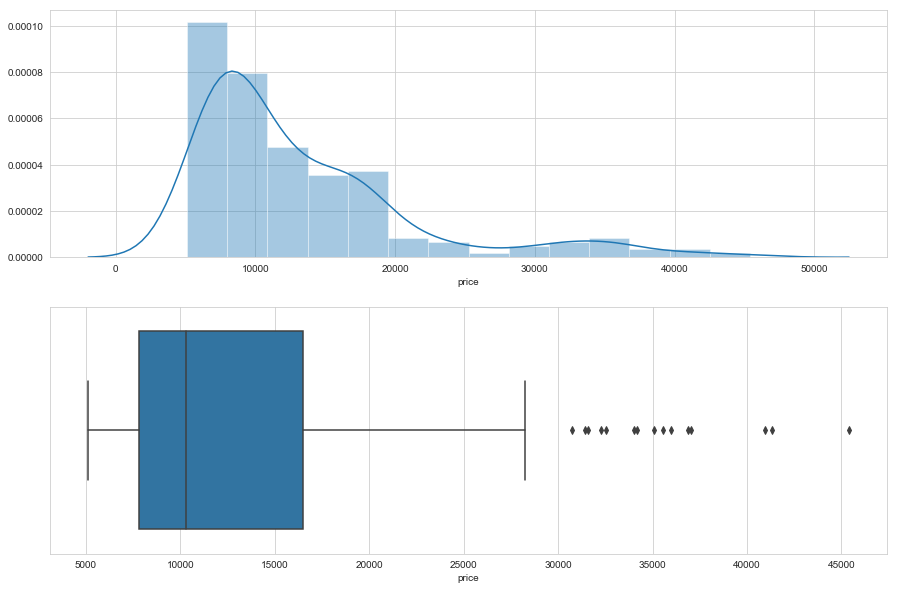

In [149]:
#Plotting the price of the our target variable 'price'
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.distplot(carprice['price'])
plt.subplot(2,1,2)
sns.boxplot(carprice['price'])

Price of the car ranges around 5k-45k with Median around 10k

### Visualize the categorical variables: 
1. Symboling 
2. fueltype
2. aspiration
3. doornumber
4. carbody
5. drivewheel
6. enginelocation
7. enginetype
8. cylindernumber
9. fuelsystem
10. Company

In [150]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [151]:
# #Plotting categorical variables using Countplot and Boxplot
# plt.figure(figsize=(20,100))
# i=1
# for col in carprice:
#     if(carprice[col].dtypes==object):
#         plt.subplot(10,2,i)
#         ax=sns.countplot(carprice[col],palette='viridis')
#         for p in ax.patches:
#             width, height = p.get_width(), p.get_height()
#             x, y = p.get_xy() 
#             ax.annotate('{:}'.format(height), (x+width/2-0.02, y + height+0.6))
#         plt.xticks(rotation=90)
#         plt.xlabel(col.capitalize())
        
#         plt.subplot(10,2,i+1)
#         sns.boxplot(carprice[col],carprice['price'],palette='viridis')
#         plt.xticks(rotation=90)
#         plt.xlabel(col.capitalize())
#         plt.ylabel('Price')
#         i+=2

In [152]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =120;

<IPython.core.display.Javascript object>

In [153]:
#Converting Cylindernumber and door number to integer

carprice['cylindernumber']=carprice['cylindernumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
carprice['doornumber']=carprice['doornumber'].replace({'two':2,'four':4})

We will not label encode the categorical variables and check the correlation between the variables

In [154]:
# # Encode the categorical features as numbers to check correlation
# def number_encode_features(df):
#     result = df.copy()
#     encoders = {}
#     for column in result.columns:
#         if result.dtypes[column] == np.object:
#             encoders[column] = preprocessing.LabelEncoder()
#             result[column] = encoders[column].fit_transform(result[column])
#     return result


# # Calculate the correlation and plot it
# encoded_data= number_encode_features(carprice)
# plt.figure(figsize=(20,20))
# sns.heatmap(abs(encoded_data.corr()), square=True,cmap='viridis')


We can see that there is a high correlation between fueltype and compression ratio, and , highwaympg and citympg. Lets check on this further.

    fueltype  compressionratio
0    gas      9.0             
1    gas      9.0             
2    gas      9.0             
3    gas      10.0            
4    gas      8.0             
..   ...      ...             
200  gas      9.5             
201  gas      8.7             
202  gas      8.8             
203  diesel   23.0            
204  gas      9.5             

[205 rows x 2 columns]


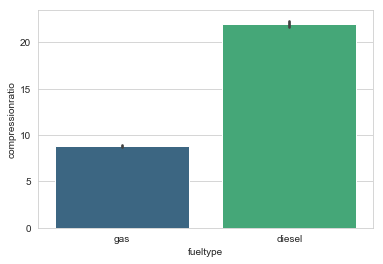

In [155]:
#Lets first analyse fueltype and compression ratio
print(carprice[["fueltype", "compressionratio"]])
sns.barplot("fueltype", "compressionratio",data=carprice,palette='viridis')

We can see the difference in the compression ratio between gas and diesel and clearly see why the columns have high correlation, we will drop compression ratio in our further analysis.

In [156]:
#Dropping compressionratio
carprice.drop('compressionratio',axis=1,inplace=True)

     citympg  highwaympg
0    21       27        
1    21       27        
2    19       26        
3    24       30        
4    18       22        
..   ..       ..        
200  23       28        
201  19       25        
202  18       23        
203  26       27        
204  19       25        

[205 rows x 2 columns]


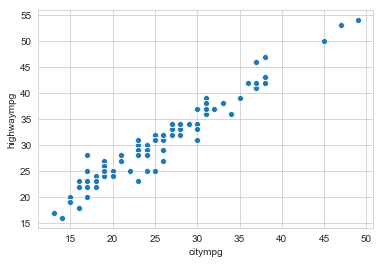

In [157]:
# Lets take a look at citympg and highwaympg variables
print(carprice[["citympg", "highwaympg"]])
sns.scatterplot("citympg", "highwaympg",data=carprice)

In [158]:
#Dropping citympg as it is highly corelated with highwaympg
carprice.drop('citympg',axis=1,inplace=True)

In [159]:
# plt.figure(figsize=(20,20))
# sns.heatmap(abs(carprice.drop('price', axis=1).corr()),annot=True,cmap='viridis')


In [160]:
#Creating dummy variables for categories 

varlist=['fueltype','aspiration','carbody','drivewheel','fuelsystem','enginetype','Company','doornumber'
         ,'enginelocation']

#Label Encoder- Symboling, doornumber, cylindernumber
carprice=pd.get_dummies(carprice,columns=varlist,prefix_sep='_',drop_first=True)


In [161]:
carprice.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo,doornumber_4,enginelocation_rear
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,0,0,0,0,1,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,0,0,1,0


In [162]:
#Splitting the data into X_train and X_test

from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(carprice, test_size=0.3, random_state=100)

In [163]:
#Checking the shape of X_train and X_test 

print(X_train.shape)
print(X_test.shape)

(143, 58)
(62, 58)


In [164]:
#Min Max Scaling of numerical columns in X_train

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

mm_scaler_list=['wheelbase','carwidth','carheight','boreratio','stroke','horsepower','peakrpm',
         'highwaympg','symboling','cylindernumber','price']

X_train[mm_scaler_list]=scaler.fit_transform(X_train[mm_scaler_list])


In [165]:
#Dividing X_test into X_test(independent variables) and y(dependent variable price)

y_train=X_train.pop('price')
X_train=X_train

In [166]:
#importing  LinearRegression from SKLearn and creating an object and fitting the model with all variables

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
#Feature selection using RFE selecting the top 15 variables

from sklearn.feature_selection import RFE
rfe=RFE(lm,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [168]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False,  True, False, False,
       False, False,  True])

In [169]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 36),
 ('wheelbase', False, 3),
 ('carlength', False, 39),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', False, 40),
 ('cylindernumber', False, 8),
 ('enginesize', False, 30),
 ('boreratio', False, 24),
 ('stroke', False, 22),
 ('horsepower', True, 1),
 ('peakrpm', False, 26),
 ('highwaympg', False, 11),
 ('fueltype_gas', False, 31),
 ('aspiration_turbo', False, 9),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 4),
 ('drivewheel_rwd', False, 15),
 ('fuelsystem_2bbl', False, 12),
 ('fuelsystem_4bbl', False, 17),
 ('fuelsystem_idi', False, 33),
 ('fuelsystem_mfi', False, 42),
 ('fuelsystem_mpfi', False, 37),
 ('fuelsystem_spdi', False, 38),
 ('fuelsystem_spfi', False, 41),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 27),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 25),
 ('enginetype_rotor

In [170]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,carwidth,horsepower,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohcf,Company_bmw,Company_buick,Company_peugeot,Company_porsche,Company_subaru,enginelocation_rear
122,-0.924500,-0.872898,0,0,1,0,0,0,0,0,0,0,0,0,0
125,1.114978,1.021826,0,1,0,0,0,0,0,0,0,0,1,0,0
166,-0.833856,0.238673,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-0.788535,0.213410,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.616439,1.501822,0,0,0,1,0,0,0,0,0,0,0,0,0


In [171]:
#Creating our first model with 15 variables from RFE

X_train_rfe=sm.add_constant(X_train_rfe)
lr1=sm.OLS(y_train,X_train_rfe).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     89.73
Date:                Thu, 21 May 2020   Prob (F-statistic):           4.92e-59
Time:                        14:40:29   Log-Likelihood:                -32.673
No. Observations:                 143   AIC:                             95.35
Df Residuals:                     128   BIC:                             139.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4470      0.170      2.628      0.010       0.110       0.783
carwidth                0.4507      0.054      8.401      0.000       0.345       0.557
horsepower              0.4027      0.048      8.434      0.000       0.308       0.497
carbody_hardtop        -0.5402      0.282     -1.916      0.058      -1.098       0.018
carbody_hatchback      -0.6429      0.174     -3.696      0.000      -0.987      -0.299
carbody_sedan          -0.4749      0.175     -2.716      0.008      -0.821      -0.129
carbody_wagon          -0.5193      0.185     -2.809      0.006      -0.885      -0.153
enginetype_dohcv       -1.0860      0.471     -2.307      0.023      -2.017      -0.155
enginetype_l            0.8663      0.335      2.585      0.011       0.203       1.530
enginetype_ohcf         0.4278      0.180      2.379      0.019       0.072       0.784
Company_bmw             1.2716      0.143      8.909      0.000       0.989       1.554
Company_buick           0.8672      0.184      4.713      0.000       0.503       1.231
Company_peugeot        -1.0110      0.374     -2.700      0.008      -1.752      -0.270
Company_porsche         0.4339      0.329      1.318      0.190      -0.218       1.085
Company_subaru         -0.6086      0.191     -3.190      0.002      -0.986      -0.231
enginelocation_rear     1.0363      0.356      2.914      0.004       0.333       1.740
==============================================================================
Omnibus:                       48.032   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.786
Skew:                           1.285   Prob(JB):                     1.63e-31
Kurtosis:                       7.146   Cond. No.                     2.50e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.92e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We have got a low P(F-stats), so we have got a good model. Also, the adjust R-squared is 0.91 which is good as well. The P-value is less than 0.05 for all our variables which is ideal. Lets find the VIF now to avoid any multicollinearity issue.

In [172]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginetype_ohcf,inf
14,Company_subaru,inf
15,enginelocation_rear,inf
0,const,40.03
5,carbody_sedan,10.55
12,Company_peugeot,10.25
4,carbody_hatchback,9.44
8,enginetype_l,9.17
6,carbody_wagon,5.45
1,carwidth,3.98


We can see that carbody_sedan has a high VIF, lets remove the variable and check our model.

In [173]:
#Creating our second model after dropping carbody_sedan as it has high VIF value
X_train_rfe.drop('Company_porsche', axis=1,inplace=True)
lr2=sm.OLS(y_train,X_train_rfe).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     95.96
Date:                Thu, 21 May 2020   Prob (F-statistic):           1.15e-59
Time:                        14:41:12   Log-Likelihood:                -33.637
No. Observations:                 143   AIC:                             95.27
Df Residuals:                     129   BIC:                             136.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4526      0.170      2.654      0.009       0.115       0.790
carwidth                0.4589      0.053      8.587      0.000       0.353       0.565
horsepower              0.4021      0.048      8.398      0.000       0.307       0.497
carbody_hardtop        -0.5417      0.283     -1.915      0.058      -1.101       0.018
carbody_hatchback      -0.6366      0.174     -3.650      0.000      -0.982      -0.292
carbody_sedan          -0.4805      0.175     -2.741      0.007      -0.827      -0.134
carbody_wagon          -0.5227      0.185     -2.819      0.006      -0.890      -0.156
enginetype_dohcv       -0.6854      0.360     -1.902      0.059      -1.398       0.028
enginetype_l            0.8742      0.336      2.601      0.010       0.209       1.539
enginetype_ohcf         0.5725      0.143      4.008      0.000       0.290       0.855
Company_bmw             1.2690      0.143      8.866      0.000       0.986       1.552
Company_buick           0.8474      0.184      4.607      0.000       0.484       1.211
Company_peugeot        -1.0292      0.375     -2.742      0.007      -1.772      -0.287
Company_subaru         -0.7535      0.156     -4.820      0.000      -1.063      -0.444
enginelocation_rear     1.3260      0.280      4.729      0.000       0.771       1.881
==============================================================================
Omnibus:                       44.732   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.472
Skew:                           1.221   Prob(JB):                     2.54e-27
Kurtosis:                       6.820   Cond. No.                     3.23e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.34e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

After removing the carbody_sedan, the model P(F-stat) is still very low. The adjusted R-square is 0.89 which is still a good number for the model. But certain variables including carbody_hardtop, carbody_wagon, highwaympg, enginelocation_rear have become significant. Lets remove the variable 'carbody_hardtop' and build our model again.

In [174]:
#Creating our third model after dropping carbody_hardtop as it has high P value

X_train_rfe.drop('enginetype_dohcv', axis=1,inplace=True)
lr3=sm.OLS(y_train,X_train_rfe).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     101.6
Date:                Thu, 21 May 2020   Prob (F-statistic):           6.55e-60
Time:                        14:41:22   Log-Likelihood:                -35.614
No. Observations:                 143   AIC:                             97.23
Df Residuals:                     130   BIC:                             135.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4553      0.172      2.644      0.009       0.115       0.796
carwidth                0.4579      0.054      8.484      0.000       0.351       0.565
horsepower              0.3767      0.046      8.112      0.000       0.285       0.469
carbody_hardtop        -0.5514      0.286     -1.931      0.056      -1.116       0.014
carbody_hatchback      -0.6542      0.176     -3.719      0.000      -1.002      -0.306
carbody_sedan          -0.4856      0.177     -2.743      0.007      -0.836      -0.135
carbody_wagon          -0.5305      0.187     -2.833      0.005      -0.901      -0.160
enginetype_l            0.8516      0.339      2.510      0.013       0.180       1.523
enginetype_ohcf         0.5956      0.144      4.144      0.000       0.311       0.880
Company_bmw             1.2945      0.144      8.994      0.000       1.010       1.579
Company_buick           0.8729      0.185      4.711      0.000       0.506       1.239
Company_peugeot        -1.0028      0.379     -2.647      0.009      -1.752      -0.253
Company_subaru         -0.7811      0.157     -4.968      0.000      -1.092      -0.470
enginelocation_rear     1.3767      0.282      4.883      0.000       0.819       1.934
==============================================================================
Omnibus:                       48.732   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.244
Skew:                           1.301   Prob(JB):                     2.89e-32
Kurtosis:                       7.196   Cond. No.                     4.38e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Our R-square has not dropped much but we still have some variables with high P value,which means that some variables are still pretty significant. We will drop carbody_wagon and build our model the fourth time.

In [175]:
#Creating our fourth model after dropping carbody_wagon as it has high VIF

X_train_rfe.drop('carbody_hardtop', axis=1,inplace=True)
lr4=sm.OLS(y_train,X_train_rfe).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     108.2
Date:                Thu, 21 May 2020   Prob (F-statistic):           3.80e-60
Time:                        14:41:31   Log-Likelihood:                -37.635
No. Observations:                 143   AIC:                             99.27
Df Residuals:                     131   BIC:                             134.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2598      0.141      1.846      0.067      -0.019       0.538
carwidth                0.4498      0.054      8.274      0.000       0.342       0.557
horsepower              0.3843      0.047      8.222      0.000       0.292       0.477
carbody_hatchback      -0.4608      0.146     -3.155      0.002      -0.750      -0.172
carbody_sedan          -0.2916      0.147     -1.981      0.050      -0.583      -0.000
carbody_wagon          -0.3385      0.160     -2.112      0.037      -0.656      -0.021
enginetype_l            0.8439      0.343      2.462      0.015       0.166       1.522
enginetype_ohcf         0.4700      0.129      3.630      0.000       0.214       0.726
Company_bmw             1.2923      0.145      8.887      0.000       1.005       1.580
Company_buick           0.9257      0.185      5.000      0.000       0.559       1.292
Company_peugeot        -0.9834      0.383     -2.570      0.011      -1.740      -0.227
Company_subaru         -0.6531      0.144     -4.535      0.000      -0.938      -0.368
enginelocation_rear     1.1231      0.252      4.456      0.000       0.625       1.622
==============================================================================
Omnibus:                       45.481   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.803
Skew:                           1.232   Prob(JB):                     1.77e-28
Kurtosis:                       6.922   Cond. No.                     3.71e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.77e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Our R-square has not dropped after dropping 'carbody_wagon' but we still have some variables with high P value. We will drop highwaympg and build our model the fourth time.

In [176]:
#Creating our fifth model after dropping highwaympg as it has high P-value

X_train_rfe.drop('carbody_sedan', axis=1,inplace=True)
lr5=sm.OLS(y_train,X_train_rfe).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     116.1
Date:                Thu, 21 May 2020   Prob (F-statistic):           2.33e-60
Time:                        14:41:39   Log-Likelihood:                -39.745
No. Observations:                 143   AIC:                             101.5
Df Residuals:                     132   BIC:                             134.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0055      0.044     -0.125      0.901      -0.092       0.081
carwidth                0.4223      0.053      7.947      0.000       0.317       0.527
horsepower              0.4036      0.046      8.734      0.000       0.312       0.495
carbody_hatchback      -0.2019      0.066     -3.064      0.003      -0.332      -0.072
carbody_wagon          -0.0729      0.089     -0.821      0.413      -0.248       0.103
enginetype_l            0.8077      0.346      2.334      0.021       0.123       1.492
enginetype_ohcf         0.5334      0.127      4.206      0.000       0.283       0.784
Company_bmw             1.2591      0.146      8.622      0.000       0.970       1.548
Company_buick           1.0098      0.182      5.543      0.000       0.649       1.370
Company_peugeot        -0.9314      0.386     -2.414      0.017      -1.695      -0.168
Company_subaru         -0.7299      0.140     -5.205      0.000      -1.007      -0.453
enginelocation_rear     1.2634      0.245      5.167      0.000       0.780       1.747
==============================================================================
Omnibus:                       42.361   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.488
Skew:                           1.194   Prob(JB):                     1.24e-23
Kurtosis:                       6.464   Cond. No.                     2.85e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.99e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Our R-square is still pretty much the same after dropping 'highway_mpg'. The p-value for all variables is less than 0.05, which means all the variables are significant now. Lets check the VIF to check for multicollinearity.

In [42]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.83
2,carwidth,6.95
4,horsepower,4.60
1,wheelbase,4.21
3,cylindernumber,3.42
10,Company_porsche,3.36
11,enginelocation_rear,2.24
6,enginetype_dohcv,2.14
7,enginetype_rotor,1.55
9,Company_buick,1.43


We can see that the VIF of carwidth is 6.95 which is pretty significant, we will drop this variable and build out model again.

In [116]:
#Creating our sixth model after dropping carwidth as it has high VIF

X_train_rfe.drop('wheelbase', axis=1,inplace=True)
lr6=sm.OLS(y_train,X_train_rfe).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     128.3
Date:                Thu, 21 May 2020   Prob (F-statistic):           6.29e-63
Time:                        14:38:25   Log-Likelihood:                 143.37
No. Observations:                 143   AIC:                            -264.7
Df Residuals:                     132   BIC:                            -232.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3662      0.058      6.331      0.000       0.252       0.481
carwidth               0.3461      0.047      7.414      0.000       0.254       0.438
horsepower             0.5626      0.046     12.220      0.000       0.472       0.654
fueltype_gas          -0.1694      0.031     -5.457      0.000      -0.231      -0.108
carbody_hardtop       -0.1065      0.073     -1.450      0.150      -0.252       0.039
carbody_hatchback     -0.2076      0.049     -4.227      0.000      -0.305      -0.110
carbody_sedan         -0.1625      0.049     -3.318      0.001      -0.259      -0.066
carbody_wagon         -0.1420      0.052     -2.730      0.007      -0.245      -0.039
Company_bmw            0.1969      0.041      4.770      0.000       0.115       0.279
Company_mitsubishi    -0.1167      0.033     -3.560      0.001      -0.182      -0.052
Company_porsche        0.1159      0.059      1.955      0.053      -0.001       0.233
==============================================================================
Omnibus:                        4.052   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.537
Skew:                           0.357   Prob(JB):                        0.171
Kurtosis:                       3.288   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping the carwidth has decrease the significance of some variable as they have high P-value. We will drop enginelocation_rear and build our model again.

In [122]:
#Creating our seventh model after dropping horsepower as it has high P value

X_train_rfe.drop('carbody_wagon', axis=1,inplace=True)
lr7=sm.OLS(y_train,X_train_rfe).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     193.5
Date:                Thu, 21 May 2020   Prob (F-statistic):           4.84e-64
Time:                        14:39:19   Log-Likelihood:                 135.01
No. Observations:                 143   AIC:                            -256.0
Df Residuals:                     136   BIC:                            -235.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2129      0.036      5.925      0.000       0.142       0.284
carwidth               0.3092      0.047      6.582      0.000       0.216       0.402
horsepower             0.6155      0.046     13.483      0.000       0.525       0.706
fueltype_gas          -0.1696      0.032     -5.243      0.000      -0.234      -0.106
carbody_hatchback     -0.0566      0.018     -3.147      0.002      -0.092      -0.021
Company_bmw            0.1681      0.042      3.985      0.000       0.085       0.251
Company_mitsubishi    -0.1304      0.034     -3.836      0.000      -0.198      -0.063
==============================================================================
Omnibus:                        3.591   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.166   Jarque-Bera (JB):                3.367
Skew:                           0.376   Prob(JB):                        0.186
Kurtosis:                       3.020   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have got a pretty good F stats and adjusted R-square. All the variables are also significant now. Lets check the VIF for multicollinearity.

In [123]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,19.81
1,carwidth,2.84
2,horsepower,2.70
3,fueltype_gas,1.33
4,carbody_hatchback,1.12
5,Company_bmw,1.10
6,Company_mitsubishi,1.05


The VIF is now less than 5 for all our variables which means we have a good model now. We will predict the values for the y_train and do the residual analysis now.

## Residual Analysis

In [124]:
#Finding the predicted y_train for our model

y_train_predict=lr7.predict(X_train_rfe)

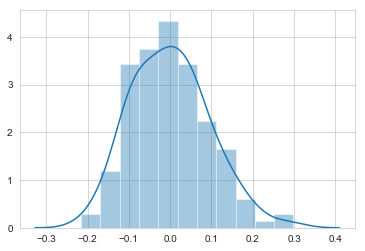

In [125]:
#Residual analysis
sns.distplot(y_train-y_train_predict)

THe graph seems to follow a normal distribution around 0. Our assumption that the error term is normally ditributed around 0 is valid for our model. We will now validate if our error is random or not.

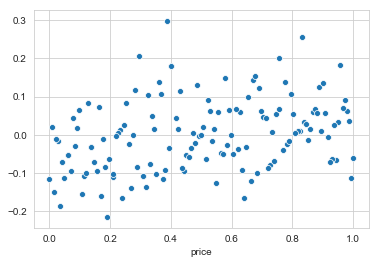

In [126]:
sns.scatterplot(y_train,y_train-y_train_predict)

Our error term are pretty random. So this proved our assumptions for linear regression regarding the error terms. <br>
Next, we will predict the values on our unseen data X_test.

In [127]:
#Copying X_test to a new variable X_test_rfe
X_test_rfe=X_test.copy()

In [128]:
#Min Max Scaling of numerical columns in X_test_rfe

X_test_rfe[mm_scaler_list]=scaler.transform(X_test_rfe[mm_scaler_list])

In [129]:
#Transforming X_test for model prediction and creating y_test

varlist=list(X_train_rfe.columns[1:,])
y_test_rfe=X_test_rfe.pop('price')
X_test_rfe=X_test_rfe[varlist]


In [130]:
#Adding constant to our test set and making the predictions.
X_test_rfe=sm.add_constant(X_test_rfe)

y_test_predict=lr7.predict(X_test_rfe)

In [131]:
# Lets check our r2 score for the test set.
from sklearn.metrics import r2_score
r2_score(y_test_rfe,y_test_predict)

0.8417445586903495

R2 score is 0.91 which is pretty similar to our model's R square which is 0.89. Lets build a scatterplot to see our initial and predicted  predictor variable.

In [132]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_rfe,y_test_predict)

0.010805095493998556

Text(0, 0.5, 'y_pred')

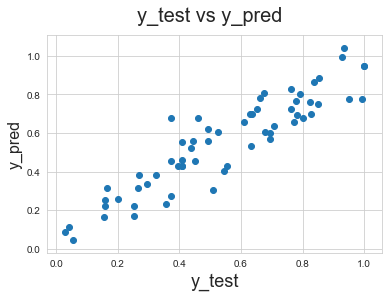

In [133]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_rfe,y_test_predict)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

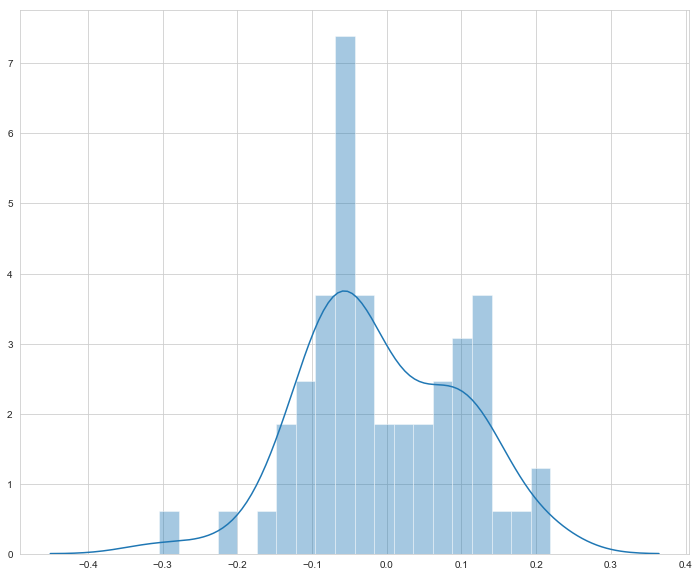

In [134]:
plt.figure(figsize=(12,10))
sns.distplot(y_test_rfe-y_test_predict,bins=20,)

Our Linear Regression equation becomes:
    

horsepower           0.626624
Company_porsche      0.303185
wheelbase            0.286992
cylindernumber       0.284464
Company_buick        0.261213
Company_bmw          0.219370
enginetype_rotor     0.129062
carbody_hatchback   -0.033323
enginetype_dohcv    -0.333741
dtype: float64


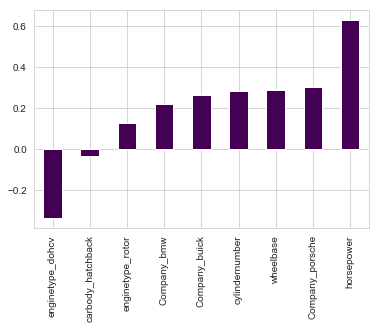

In [91]:
coefs = lr7.params[1:].sort_values()
plt.subplot(1,1,1)
coefs.plot(kind="bar",cmap='viridis')
print (coefs.sort_values(ascending = False))

In [92]:
import sklearn.metrics as metrics
# from import mean_absolute_error

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_rfe,y_test_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_rfe,y_test_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_rfe,y_test_predict)))

Mean Absolute Error: 0.050725957348159934
Mean Squared Error: 0.0043179899427575295
Root Mean Squared Error: 0.06571141409799008
